In [7]:
import os
_FINAL_DFS_DIR = os.path.join('..', '..', 'final_dfs')
_CSV_DIR = os.path.join('..', '..', 'csv_files')

import sys
sys.path.append('..')
import plotconfig

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import stats
import pandas as pd

In [9]:
dbf = os.path.join(_FINAL_DFS_DIR, 'results.parquet')
df = pd.read_parquet(dbf, engine='pyarrow')


mask = ((df['method_name'] == "LinearRegression") & 
        (df['training_size'] == plotconfig.LAST_N) & 
        (df['eeg_name'] == "EEG_Raw") & 
        (df['test_name'] == "random"))

mask = ((df['method_name'] == "LinearRegression") & 
        (df['training_size'] == plotconfig.LAST_N) & 
        (df['eeg_name'] == "EEG_Raw") & 
        (df['test_name'] == "diagonal"))

results = df[mask]
first_row = results.iloc[0]

In [10]:
humanfile = os.path.join(_CSV_DIR, 'image-distance-user-evaluations.csv')
df_human = pd.read_csv(humanfile)

In [11]:
df_human['euclidean_d'] = df_human['distance'] * results['true_distances'].explode().max()
df_human['reversed_eval'] = 1-df_human['distance_eval']
df_human

,source_id,distance,distance_eval,euclidean_d,reversed_eval
0,3912,0.0000,0.00,0.000000,1.00
1,3912,0.0343,0.05,1.583286,0.95
2,3912,0.0784,0.10,3.618939,0.90
3,3912,0.1470,0.15,6.785510,0.85
4,3912,0.2352,0.20,10.856816,0.80
...,...,...,...,...,...
155,2377,0.3529,0.60,16.289840,0.40
156,2377,0.4705,0.70,21.718247,0.30
157,2377,0.6372,0.80,29.413108,0.20
158,2377,0.7941,0.90,36.655601,0.10


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


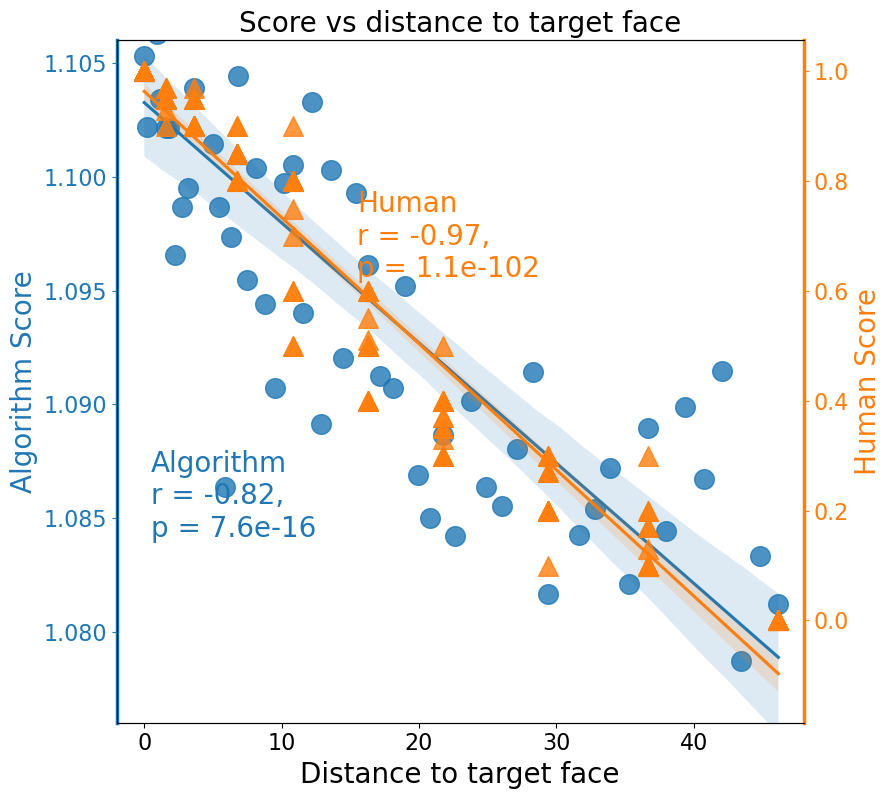

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
# sns.scatterplot(data=first_row, x="true_distances", y="scores", s=200)
sns.regplot(data=first_row, x="true_distances", y="scores", 
            scatter_kws={"s": 200})

# Calculate regression statistics
x = first_row["true_distances"]
y = first_row["scores"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
p_value_formatted = f"{p_value:.1e}"

marker_color = sns.color_palette()[0]
statistic_fontsize = 20
plt.text(0.05, 0.40, f'Algorithm\n'
                    f'r = {r_value:.2f}, \n'
                    f'p = {p_value_formatted}', 
        transform=ax.transAxes,
        verticalalignment='top',
        fontsize=statistic_fontsize, 
        color=marker_color)

fontsize = 20
plt.title("Score vs distance to target face", fontsize=fontsize)
plt.xlabel("Distance to target face", fontsize=fontsize)
plt.ylabel("Algorithm Score", fontsize=fontsize)

plt.xlim(-2, 48)  # Set x-axis limits from 0 to 60
plt.ylim(1.076, 1.106)  # Set y-axis limits from 0 to 10
plt.tight_layout()

labelsize = 16
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize, colors=marker_color)
ax.yaxis.label.set_color(marker_color)
ax.spines['left'].set_color(marker_color)
ax.spines['left'].set_linewidth(2.5)  # Adjust the linewidth as needed


ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

ax2 = ax.twinx()
marker_color = sns.color_palette()[1]
sns.regplot(data=df_human, x="euclidean_d", y="reversed_eval", 
            color=marker_color, scatter_kws={"s": 200}, marker='^')

ax2.set_ylabel("Human Score", fontsize=fontsize)


# Calculate regression statistics
x = df_human["euclidean_d"]
y = df_human["reversed_eval"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
p_value_formatted = f"{p_value:.1e}"

plt.text(0.35, 0.78, f'Human\n'
                     f'r = {r_value:.2f}, \n'
                    f'p = {p_value_formatted}', 
        transform=ax.transAxes,
        verticalalignment='top',
        fontsize=statistic_fontsize, 
        color=marker_color)

ax2.yaxis.label.set_color(marker_color)
ax2.tick_params(axis='y', labelsize=labelsize, colors=marker_color)
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax2.spines['right'].set_color(marker_color)
ax2.spines['right'].set_linewidth(2.5)  # Adjust the linewidth as needed

# ax.set_zorder(1) 
# ax2.set_zorder(2) 

# Save as high-definition
plotconfig.save_fig("score_vs_distance")